In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [5]:
df= pd.read_csv('Diwali Sales Data.csv',encoding='unicode_escape')
#to avoid encoding error


In [7]:
df.shape


(11251, 15)

In [10]:
df.head()


,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [14]:
#drop blank columns
df.drop(['Status','unnamed1'],axis=1,inplace=True)

In [16]:
#checking for null values
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [18]:
#drop null values
df.dropna(inplace=True)

In [20]:
df.shape

(11239, 13)

In [22]:
pd.isnull(df).sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [24]:
#changing data type
df["Amount"]=df['Amount'].astype("int")

In [26]:
df.Amount.dtypes

dtype('int64')

In [28]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [30]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [32]:
df[['Age','Orders','Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


Exploratory Data Analysis(EDA)

Gender

In [36]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

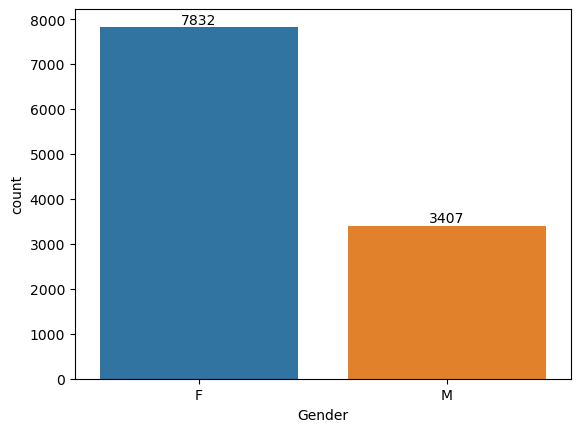

In [38]:
g=sns.countplot(x='Gender',data=df)
for bars in g.containers:
    g.bar_label(bars)

In [40]:
gen_sales=df.groupby(['Gender'],as_index=False)["Amount"].sum().sort_values(by='Amount',ascending=False)
gen_sales

,Gender,Amount
0,F,74335853
1,M,31913276


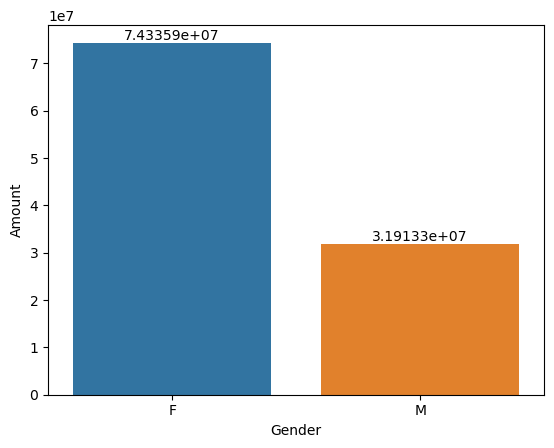

In [42]:
h=sns.barplot(x='Gender',y='Amount',data=gen_sales)

for bars in h.containers:
    h.bar_label(bars)

Age

In [45]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

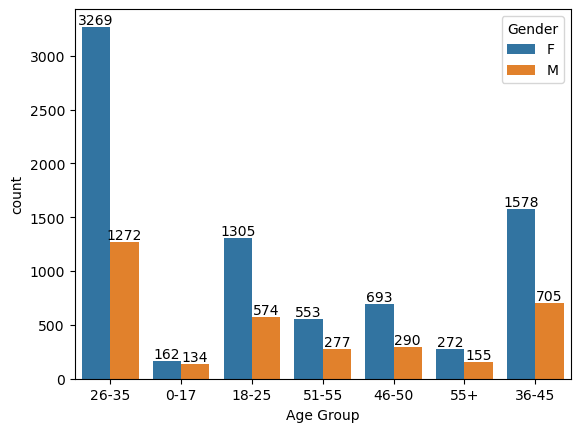

In [47]:
a=sns.countplot(x="Age Group",data=df,hue="Gender")
for bars in a.containers:
    a.bar_label(bars)


<Axes: xlabel='Age Group', ylabel='Amount'>

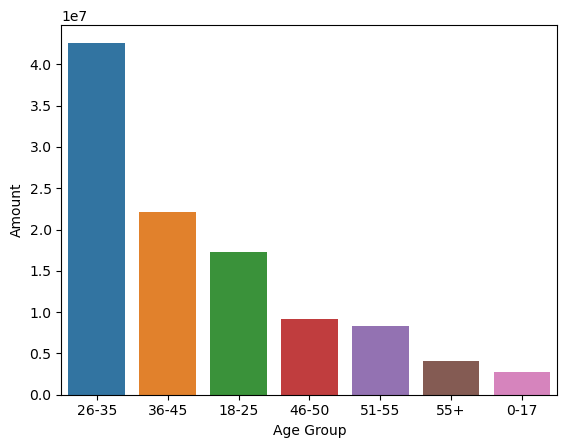

In [49]:
#total amount vs age group
age_sales=df.groupby(['Age Group'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.barplot(x='Age Group',y='Amount',data=age_sales)

State


In [52]:
df.columns


Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

<Axes: xlabel='State', ylabel='Orders'>

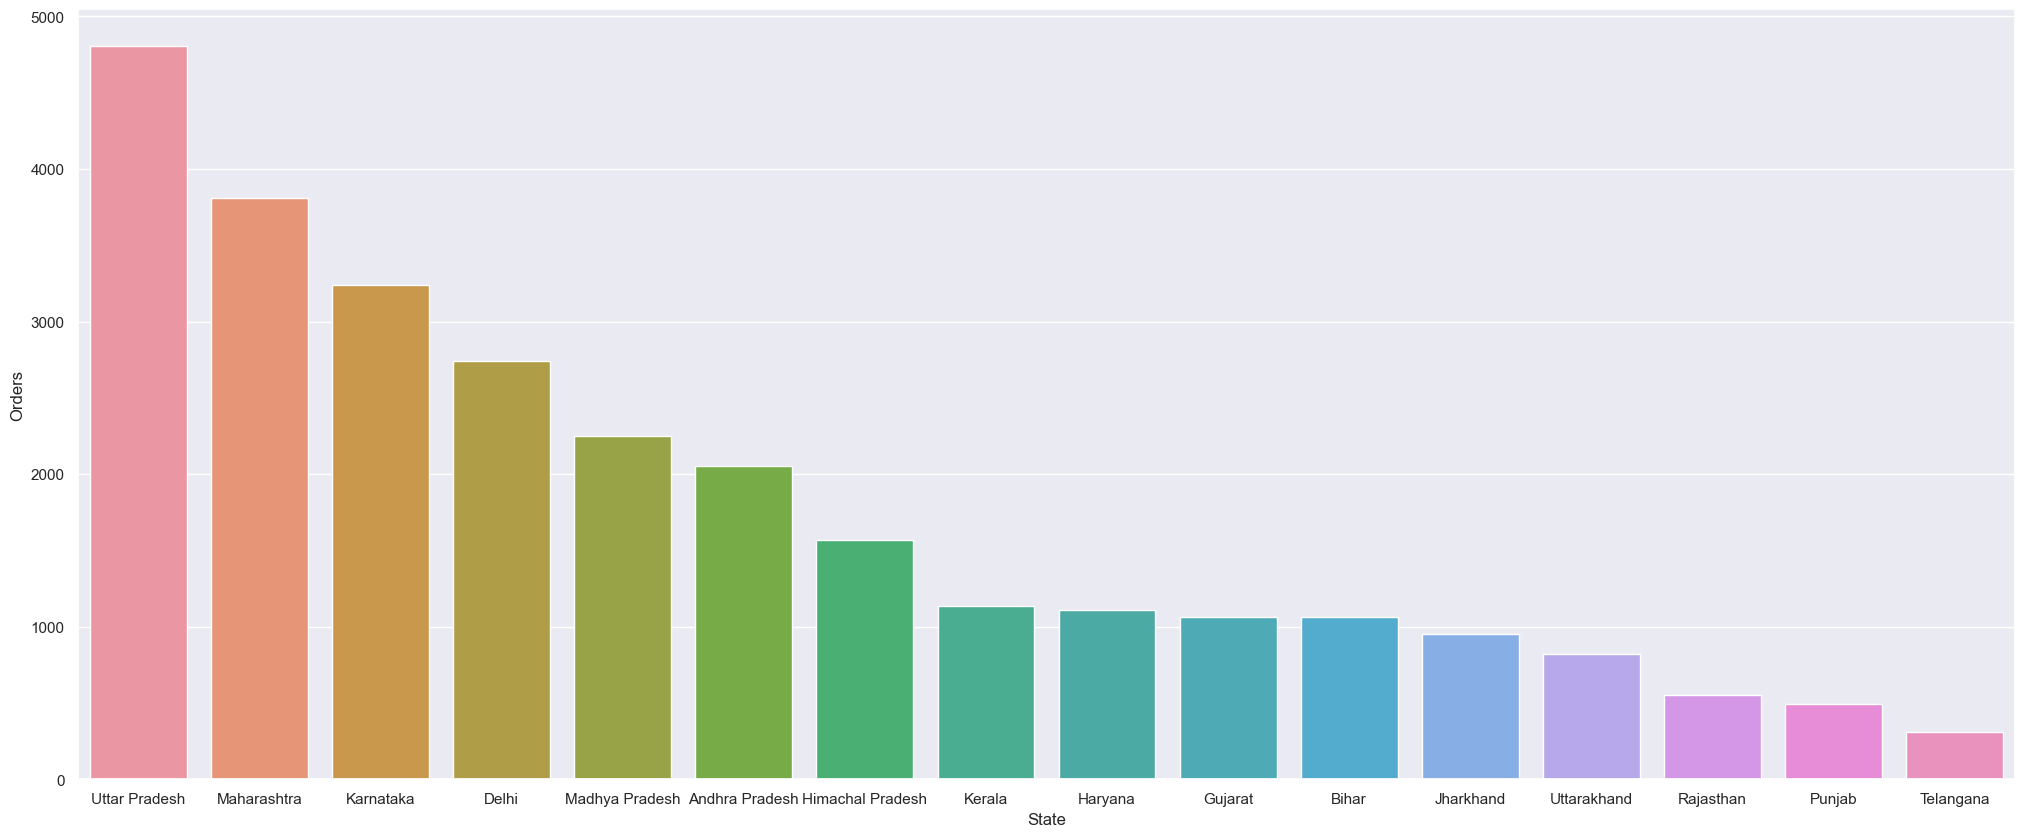

In [54]:
#total number of orders from top 10 states
state_sales=df.groupby(['State'],as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False)
state_sales.head(10)

sns.set(rc={'figure.figsize':(25,10)})
sns.barplot(x='State',y='Orders',data=state_sales)

Marital_status

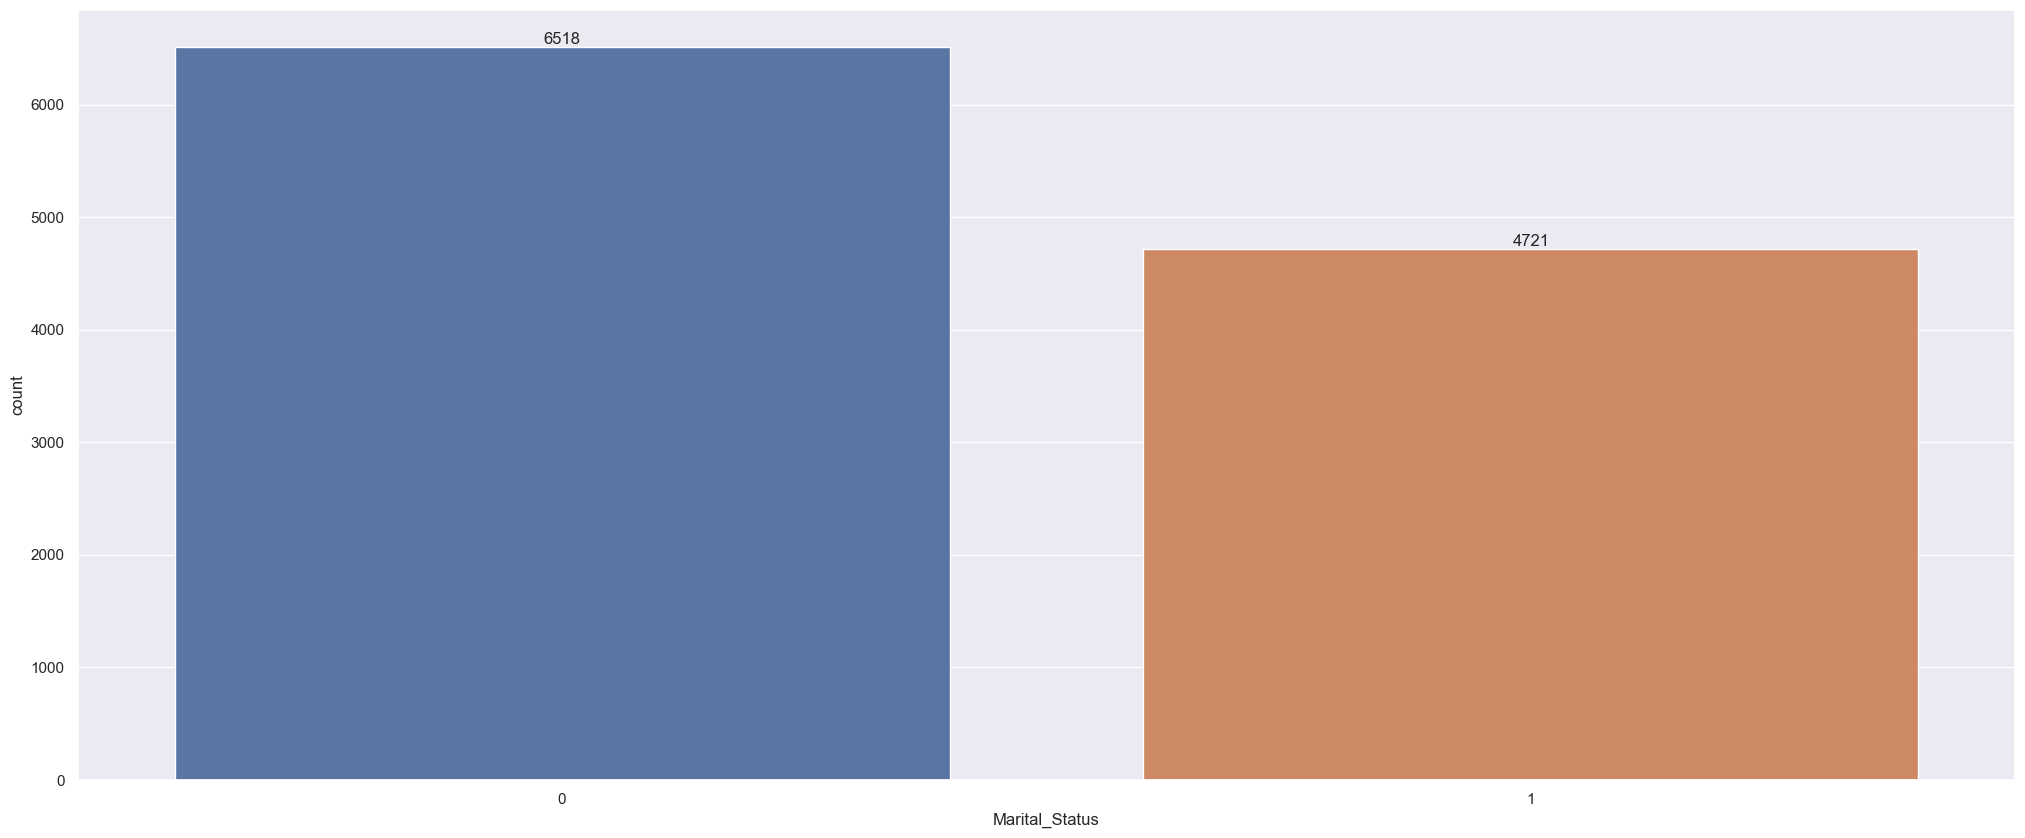

In [57]:
b=sns.countplot(x="Marital_Status",data=df)
sns.set(rc={'figure.figsize':(2,15)})
for bars in b.containers:
    b.bar_label(bars)

In [59]:
Marital_amount=df.groupby(['Marital_Status','Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
Marital_amount

,Marital_Status,Gender,Amount
0,0,F,43786646
2,1,F,30549207
1,0,M,18338738
3,1,M,13574538


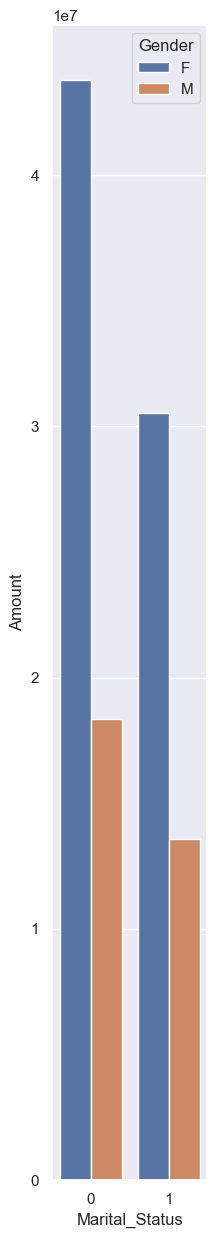

In [61]:
sns.barplot(x='Marital_Status',y='Amount',hue='Gender',data=Marital_amount)
sns.set(rc={'figure.figsize':(2,5)})

Occupation

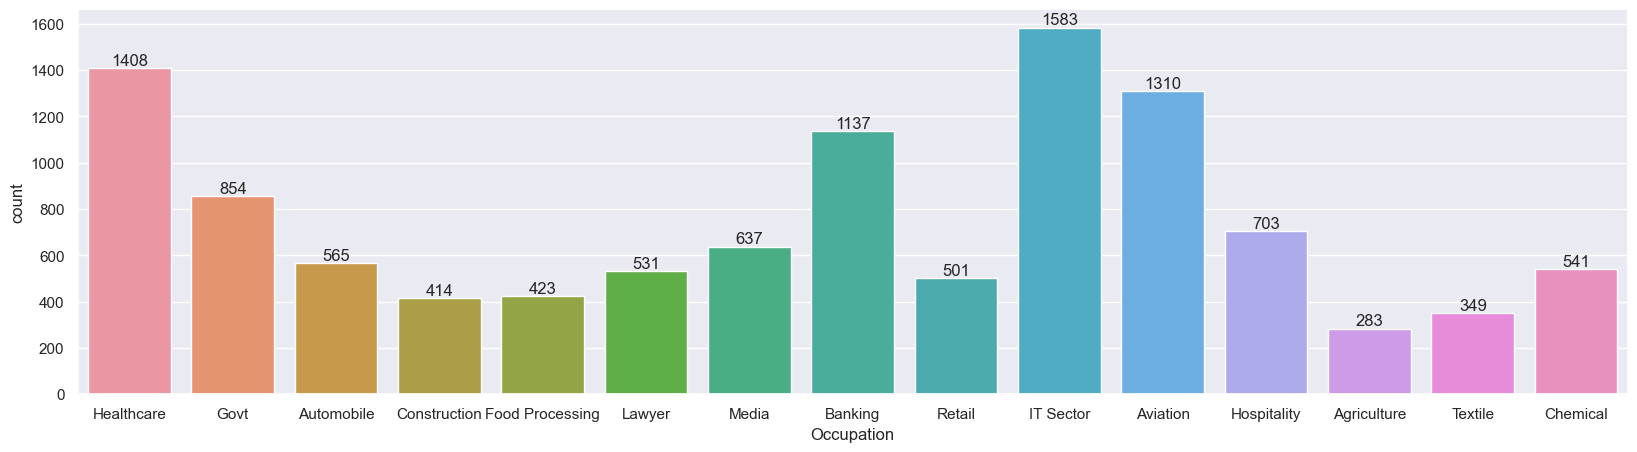

In [196]:
sns.set(rc={'figure.figsize':(20,5)})
c=sns.countplot(data=df,x='Occupation')
for bars in c.containers:
    c.bar_label(bars)

In [204]:
occu_amount=df.groupby(['Occupation'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
occu_amount                       

,Occupation,Amount
10,IT Sector,14755079
8,Healthcare,13034586
2,Aviation,12602298
3,Banking,10770610
7,Govt,8517212
9,Hospitality,6376405
12,Media,6295832
1,Automobile,5368596
4,Chemical,5297436
11,Lawyer,4981665


<Axes: xlabel='Occupation', ylabel='Amount'>

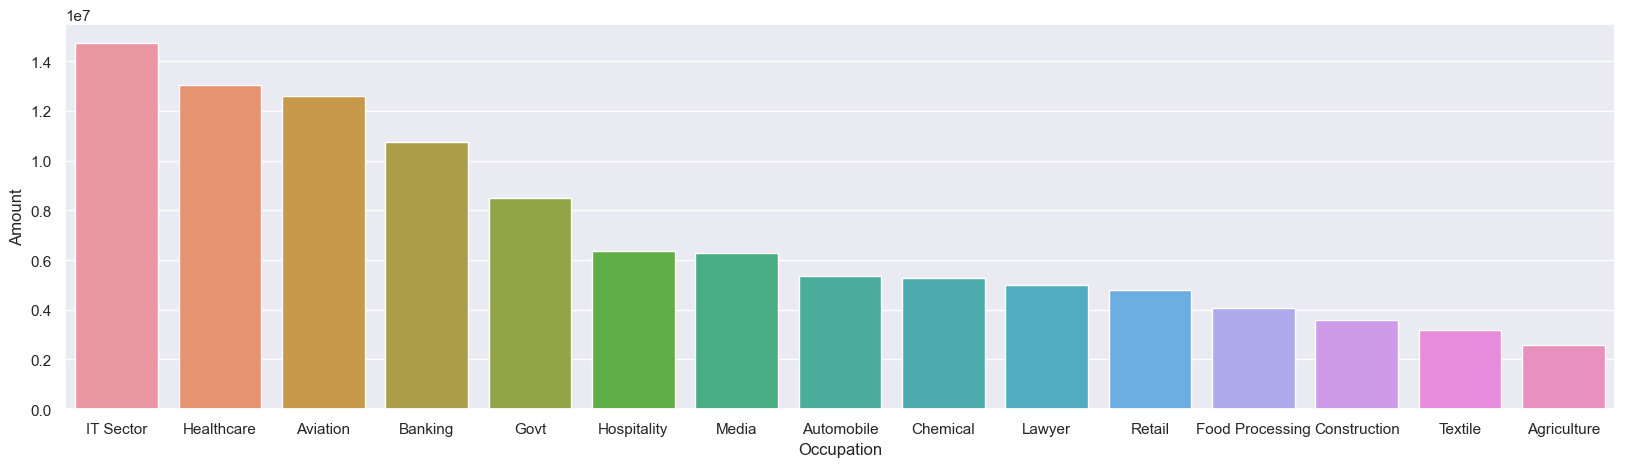

In [206]:
sns.barplot(x='Occupation',y='Amount',data=occu_amount)

Product category

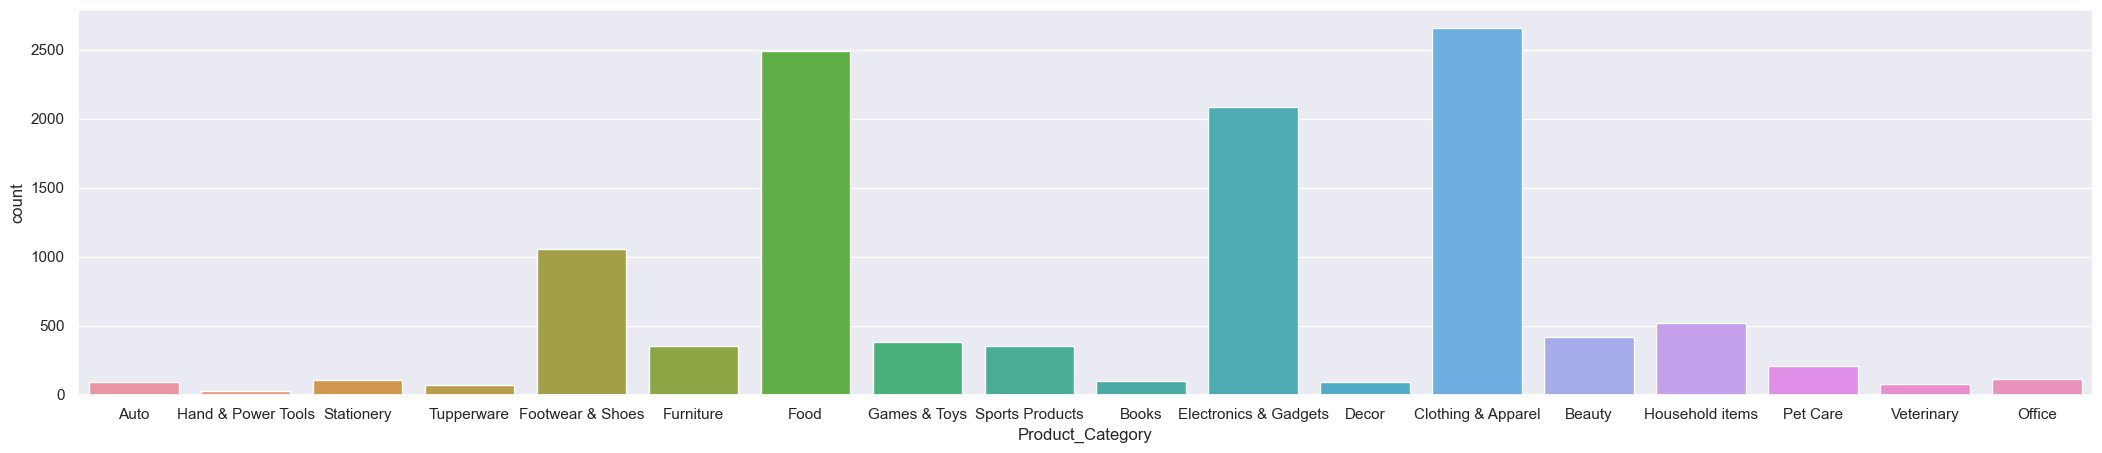

In [78]:
sns.countplot(x="Product_Category",data=df)
sns.set(rc={'figure.figsize':(26,6)})

<Axes: xlabel='Product_Category', ylabel='Amount'>

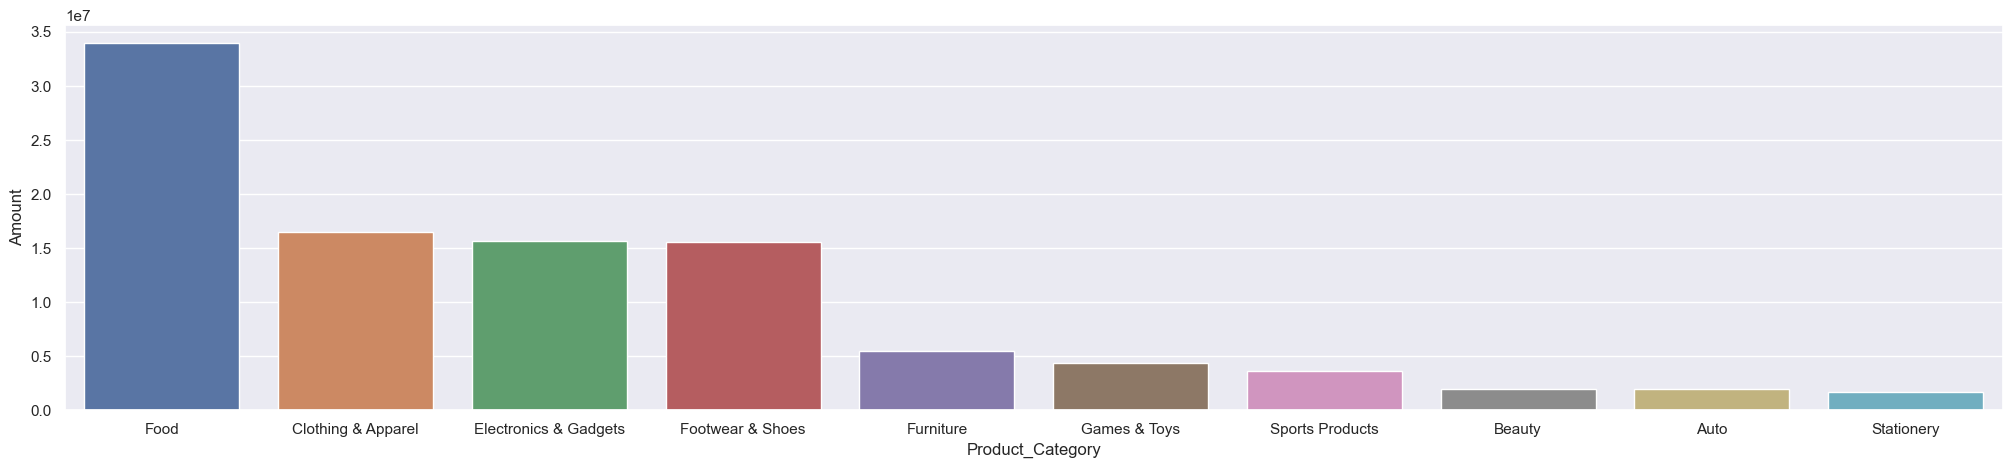

In [63]:
category_amount=df.groupby(['Product_Category'],as_index=False)["Amount"].sum().sort_values(by='Amount',ascending=False).head(10)
sns.set(rc={'figure.figsize':(25,5)})
sns.barplot(x='Product_Category',y='Amount',data=category_amount)